##Setup

In [0]:
import mido
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import colorConverter
from PIL import Image
import os
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch


# Data import

In [2]:
# Unzip IMAGES file

!unzip IMAGES_SHORT.zip

Archive:  IMAGES_SHORT.zip
   creating: IMAGES_SHORT/
  inflating: IMAGES_SHORT/MIDI-Unprocessed_051_PIANO051_MID--AUDIO-split_07-06-17_Piano-e_3-02_wav--5.png  
  inflating: IMAGES_SHORT/MIDI-Unprocessed_06_R1_2011_MID--AUDIO_R1-D2_15_Track15_wav.png  
  inflating: IMAGES_SHORT/MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO_10_R1_2014_wav--2.png  
  inflating: IMAGES_SHORT/MIDI-Unprocessed_042_PIANO042_MID--AUDIO-split_07-06-17_Piano-e_1-02_wav--3.png  
  inflating: IMAGES_SHORT/MIDI-Unprocessed_16_R1_2008_01-04_ORIG_MID--AUDIO_16_R1_2008_wav--2.png  
  inflating: IMAGES_SHORT/MIDI-Unprocessed_R1_D1-9-12_mid--AUDIO-from_mp3_10_R1_2015_wav--2.png  
  inflating: IMAGES_SHORT/ORIG-MIDI_02_7_7_13_Group__MID--AUDIO_15_R1_2013_wav--2.png  
  inflating: IMAGES_SHORT/MIDI-Unprocessed_R1_D2-21-22_mid--AUDIO-from_mp3_22_R1_2015_wav--1.png  
  inflating: IMAGES_SHORT/MIDI-Unprocessed_18_R1_2006_01-05_ORIG_MID--AUDIO_18_R1_2006_02_Track02_wav.png  
  inflating: IMAGES_SHORT/ORIG-MIDI_01_7_7_13_Group__

In [3]:
%pwd

'/content'

# Pre-processing


In [6]:
SHORT = True

imgpath = '/content/IMAGES_SHORT/'

filenames = []

for i in os.listdir(imgpath):
  filenames.append(i)
print(filenames[0])
    
if SHORT:
  with open('short_song_list.csv','r') as songfile:
    for line in songfile:
      filenames = line.split(',')
    
print(filenames[0])

MIDI-Unprocessed_XP_11_R1_2004_03-04_ORIG_MID--AUDIO_11_R1_2004_03_Track03_wav.png
MIDI-Unprocessed_R1_D1-1-8_mid--AUDIO-from_mp3_06_R1_2015_wav--3.png


(360, 1080, 4)
(388800, 4)


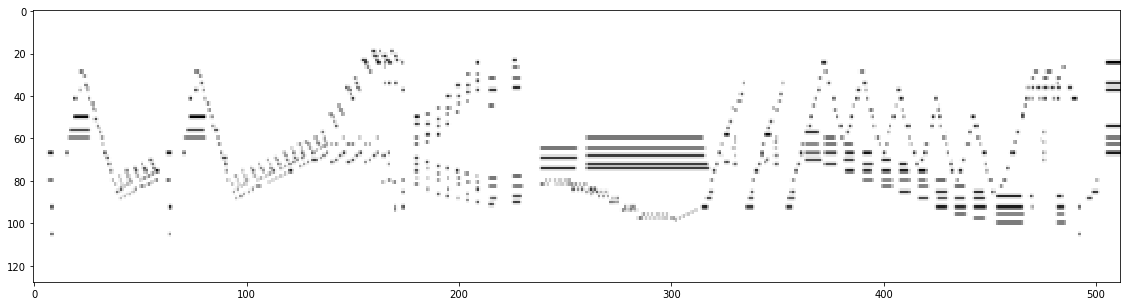

In [13]:

image = Image.open(imgpath+filenames[0])
print(np.asarray(image).shape)
print(np.asarray(image.getdata()).shape)
loader = transforms.Compose([transforms.Resize((360,1080)),
                             transforms.CenterCrop((256,800)),
                             transforms.Resize((128,512)),
                             transforms.Grayscale(num_output_channels=1),
                             transforms.ToTensor()])


def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
#     image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    
    return image  #assumes that you're using GPU

image = loader(image).float()

plt.figure(figsize=(20,5))
plt.imshow(image[0],cmap='gray')
plt.show()

In [0]:

# image = Image.open(imgpath+filenames[0])
# loader = transforms.Compose([transforms.Resize((360,640)),
#                              transforms.CenterCrop((275,480)),
#                              transforms.Grayscale(num_output_channels=1),
#                              transforms.ToTensor()])


# def image_loader(image_name):
#     """load image, returns cuda tensor"""
#     image = Image.open(image_name)
#     image = loader(image).float()
#     image = Variable(image, requires_grad=True)
# #     image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    
#     return image  #assumes that you're using GPU

# image = loader(image).float()

# plt.imshow(image[0],cmap='gray')
# plt.show()

In [5]:
# Get the training set tensors into a list
training_set = []

training_set

for i in filenames:
  if i is not "\n":
    try:
      training_set.append(image_loader(imgpath + i))
    except IOError:
      print("Error opening file ",i)
    

NameError: ignored

In [6]:
#print(len(training_set[0:1160]))
print(len(training_set[0:525]))


525


(1, 128, 1000)

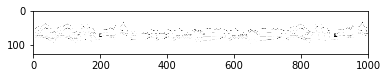

In [7]:
plt.imshow(training_set[100].detach().numpy().squeeze(),cmap='gray')

training_set[0].detach().numpy().shape

In [0]:
# Michael Dataset Extender
class Dataset_Handler(torch.utils.data.Dataset):
  def __init__(self, input_v):
    self.input = input_v


  def __len__(self):
    return len(self.input)

  def __getitem__(self, index):
    return self.input[index]

In [0]:
batch_size = 25

#train_class = Dataset_Handler(training_set[0:1160])
train_class = Dataset_Handler(training_set[0:525])

train = torch.utils.data.DataLoader(train_class, batch_size = batch_size, shuffle = True)


(360, 1080, 4)


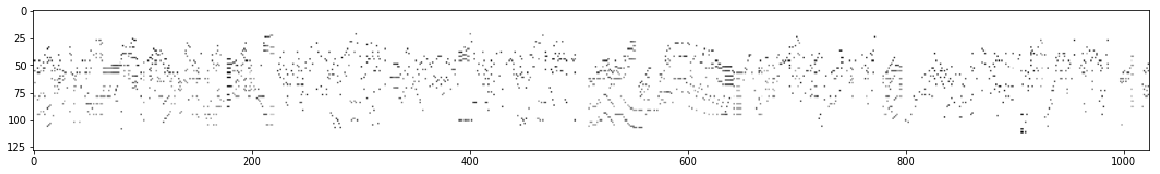

In [195]:
image = Image.open(imgpath+filenames[0])
print(np.asarray(image).shape)
loader = transforms.Compose([transforms.Resize((360,1080)),
                             transforms.CenterCrop((200,800)),
                             transforms.Resize((128,1024)),
                             transforms.Grayscale(num_output_channels=1),
                             transforms.ToTensor()])


def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
#     image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    
    return image  #assumes that you're using GPU

image = loader(image).float()

plt.figure(figsize=(20,5))
plt.imshow(image[0],cmap='gray')
plt.show()

In [0]:
batch_size = 128

#train_class = Dataset_Handler(training_set[0:1160])
train_class = Dataset_Handler(training_set[0:525])

dataloader = torch.utils.data.DataLoader(train_class, batch_size = batch_size, shuffle = True)

# DCGAN 


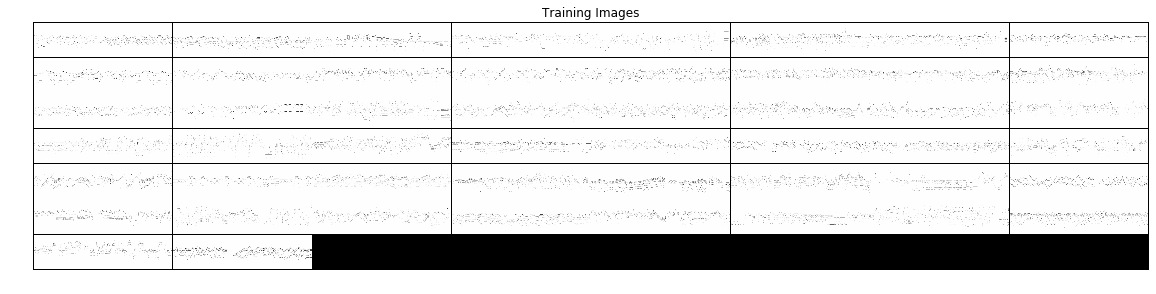

In [81]:
import torchvision.datasets as dset
import torchvision.utils as vutils

batch_size=50
workers=1
ngpu=1

image_size=(128,512)
dataroot = '/content'
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize((360,1080)),
                               transforms.CenterCrop((256,800)),
                               transforms.Resize(image_size),
                               transforms.Grayscale(num_output_channels=3),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(20,40))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [0]:
# custom weights initialization called on netG and netD
def weights_init(m):
  classname = m.__class__.__name__
  if classname.find('Conv') != -1:
    nn.init.normal_(m.weight.data, 0.0, 0.02)
  elif classname.find('BatchNorm') != -1:
    nn.init.normal_(m.weight.data, 1.0, 0.02)
    nn.init.constant_(m.bias.data, 0)

In [0]:
# Generator Code
import torch.nn as nn

nz = 100
ngf = 64
ndf = 64
lr = 0.0001
nc = 3
ngpu = 1
beta1 = 0.5
device = torch.device("cuda:0")

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            #PrintLayer(),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            #PrintLayer(),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            #PrintLayer(),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 4, 0, bias=False),
            #PrintLayer(),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, 32, (4,6), (2,4), 1, bias=False),
            #PrintLayer(),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, nc, (1,2), (1,2), 0, bias=False),
            #PrintLayer(),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)


In [157]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(4, 4), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace)
    (12): ConvTranspose2d(64, 32, kernel_size=(4, 6), stride=(2, 4), padding=(1, 1), bias=False)
    (13): ReLU(inplace)
    (14): ConvTranspose2d(32, 3, k

In [0]:
class PrintLayer(nn.Module):
    def __init__(self):
        super(PrintLayer, self).__init__()
    
    def forward(self, x):
        # Do your print / debug stuff here
        print(x.shape)
        return(x)

class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, 32, 2, 2, 0, bias=False),
            #PrintLayer(),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, ndf, 4, 2, 1, bias=False),
            #PrintLayer(),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, (2,4), 1, bias=False),
            #PrintLayer(),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, (2,4), 1, bias=False),
            #PrintLayer(),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            #PrintLayer(),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            #PrintLayer(),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [159]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): LeakyReLU(negative_slope=0.2, inplace)
    (4): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 4), padding=(1, 1), bias=False)
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.2, inplace)
    (7): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 4), padding=(1, 1), bias=False)
    (8): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2, inplace)
    (10): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): LeakyReLU(negative_slope=0.2, inplace)
    (13): Conv2d(512, 1, ke

In [0]:

import torch.optim as optim
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1
fake_label = 0

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
#optimizerD = optim.SGD(netD.parameters(), lr=lr, momentum=0.9)
optimizerG = optim.Adam(netG.parameters(), lr=0.001, betas=(beta1, 0.999))
#optimizerG = optim.SGD(netG.parameters(), lr=0.00005, momentum=0.8)


In [209]:
# Training Loop
num_epochs = 40
batch_size=50
workers = 1

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

#real_label = (real_label-1)*(-1)
#fake_label = (fake_label-1)*(-1)

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        #print("DEBUG: ",real_cpu.shape,real_cpu.size(0))
        b_size = real_cpu.size(0)
        #print("b_size = ",b_size)
        label = torch.full((b_size,), real_label, device=device)
        #print("label = ",label)
        # Forward pass real batch through D
        #output = netD(real_cpu).view(-1)
        output = netD(real_cpu).view(-1)
        #print("output shape = ",output.shape)
        #print("output = ", output)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        #print("fake shape = ",fake.shape)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Add the gradients from the all-real and all-fake batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        #print(output.shape)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/40][0/11]	Loss_D: 0.8730	Loss_G: 1.9962	D(x): 0.7210	D(G(z)): 0.4170 / 0.1448
[1/40][0/11]	Loss_D: 1.3179	Loss_G: 1.9474	D(x): 0.8292	D(G(z)): 0.6723 / 0.1483
[2/40][0/11]	Loss_D: 1.6920	Loss_G: 1.5549	D(x): 0.6701	D(G(z)): 0.7151 / 0.2256
[3/40][0/11]	Loss_D: 1.5056	Loss_G: 1.6437	D(x): 0.6117	D(G(z)): 0.6318 / 0.1987
[4/40][0/11]	Loss_D: 1.5929	Loss_G: 0.5079	D(x): 0.2937	D(G(z)): 0.2604 / 0.6080
[5/40][0/11]	Loss_D: 1.3175	Loss_G: 1.4771	D(x): 0.5394	D(G(z)): 0.4941 / 0.2361
[6/40][0/11]	Loss_D: 1.1974	Loss_G: 1.0759	D(x): 0.4165	D(G(z)): 0.2626 / 0.3454
[7/40][0/11]	Loss_D: 1.0261	Loss_G: 2.1781	D(x): 0.6099	D(G(z)): 0.4046 / 0.1171
[8/40][0/11]	Loss_D: 0.8917	Loss_G: 1.7466	D(x): 0.6379	D(G(z)): 0.3463 / 0.1800
[9/40][0/11]	Loss_D: 1.3668	Loss_G: 1.6977	D(x): 0.7367	D(G(z)): 0.6375 / 0.1989
[10/40][0/11]	Loss_D: 1.3139	Loss_G: 1.4485	D(x): 0.4685	D(G(z)): 0.4142 / 0.2386
[11/40][0/11]	Loss_D: 1.2183	Loss_G: 2.2453	D(x): 0.8701	D(G(z)): 0.6578 / 0.1090


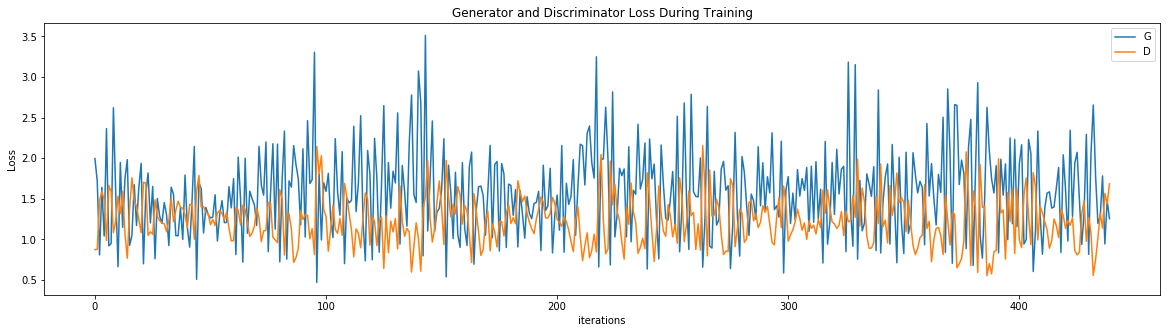

In [210]:
plt.figure(figsize=(20,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

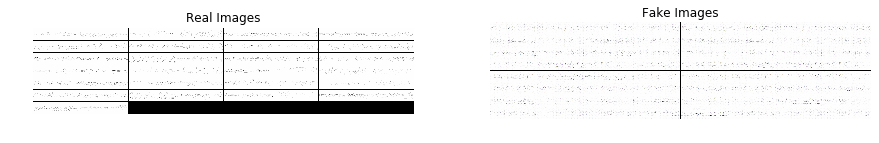

In [211]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

torch.Size([1, 3, 128, 512])


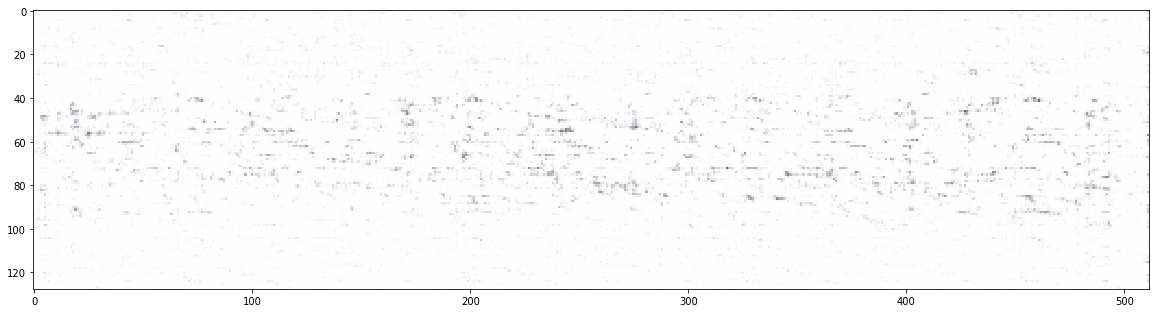

In [224]:
def print_image():
  fixed_noise = torch.randn(1, nz, 1, 1, device=device)
  noise_img = netG(fixed_noise)
  print(noise_img.shape)
  npimg = noise_img.cpu().detach().numpy().reshape((3,128,512))
  npimg_norm = (npimg/2)+(0.5)
  plt.figure(figsize=(20,10))
  plt.imshow(np.transpose(npimg_norm,(1,2,0)),cmap='gray')
  plt.show()
  
print_image()

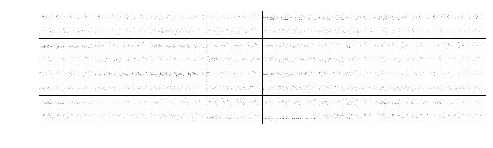

In [201]:
import matplotlib.animation as animation
from IPython.display import HTML

#%%capture
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())


# Old Model Data


In [11]:

import torch
import torch.optim as optim

# setup the GANs

#WGAN first


# LSGAN implementation

LS_G = torch.nn.Sequential(
    torch.nn.Linear(100, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 512),
    torch.nn.Linear(512 , 1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 128*1000),
    torch.nn.Tanh()
)

LS_D = torch.nn.Sequential(
    torch.nn.Linear(128 * 1000, 1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 512),
    torch.nn.Linear(512 , 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 1),
    torch.nn.Sigmoid()
)

LS_G_solver = optim.RMSprop(LS_G.parameters(), lr=0.00005)
LS_D_solver = optim.RMSprop(LS_D.parameters(), lr=0.00005)

LS_G.cuda()
LS_D.cuda()

Sequential(
  (0): Linear(in_features=128000, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=1, bias=True)
  (6): Sigmoid()
)

In [0]:

# import torch
# import torch.optim as optim

# # setup the GANs

# #WGAN first


# # LSGAN implementation

# LS_G = torch.nn.Sequential(
#     torch.nn.Linear(100, 256),
#     torch.nn.ReLU(),
#     torch.nn.Linear(256, 512),
#     torch.nn.Linear(512 , 1024),
#     torch.nn.ReLU(),
#     torch.nn.Linear(1024, 275*480),
#     torch.nn.Tanh()
# )

# LS_D = torch.nn.Sequential(
#     torch.nn.Linear(275 * 480, 1024),
#     torch.nn.ReLU(),
#     torch.nn.Linear(1024, 512),
#     torch.nn.Linear(512 , 256),
#     torch.nn.ReLU(),
#     torch.nn.Linear(256, 1),
#     torch.nn.Sigmoid()
# )

# LS_G_solver = optim.RMSprop(LS_G.parameters(), lr=0.0001)
# LS_D_solver = optim.RMSprop(LS_D.parameters(), lr=0.0001)

# LS_G.cuda()
# # LS_D.cuda()

In [0]:
import torch.nn as nn
criterion = nn.BCELoss()

In [0]:
# Function to train descriminator and return loss
def train_discriminator(real_data, fake_data):
    real_target = real_data_target(batch_size)#.detach() # Added late
    fake_target = fake_data_target(batch_size).detach()
    
    # Calculate error and backpropagate
    prediction_real = LS_D(real_data)
    real_loss = criterion(prediction_real, real_target)

    # Calculate error and backpropagate
    prediction_fake = LS_D(fake_data)
    fake_loss = criterion(prediction_fake, fake_target)
    
    # Reset discriminator gradients and update weights
    total_loss = real_loss + fake_loss
    LS_D_solver.zero_grad()  
    total_loss.backward()
    LS_D_solver.step()
      
    return total_loss

In [0]:
from torch.autograd import Variable

def images_to_vectors(images):
  return images.view(images.size(0), 128*1000)

def vectors_to_images(vectors):
  return vectors.view(vectors.size(0), 1, 128, 1000)

def real_data_target(size):
  '''
  Tensor containing ones, with shape = size
  '''
  data = Variable(torch.ones(size, 1))
  if torch.cuda.is_available(): return data.cuda()
  return data

def fake_data_target(size):
  '''
  Tensor containing zeros, with shape = size
  '''
  data = Variable(torch.zeros(size, 1))
  if torch.cuda.is_available(): return data.cuda()
  return data

def noise(size):
  n = Variable(torch.randn(size, 100))
  if torch.cuda.is_available(): return n.cuda() 
  print("Not using cuda for noise")
  return n

# Function to train the generator
def train_generator(fake_data):
    real_target = real_data_target(batch_size)
        
    # Calculate error and backpropagate
    prediction = LS_D(fake_data)
    train_loss = criterion(prediction, real_target)
    
    # Update generator weights with gradients
    LS_G_solver.zero_grad()
    train_loss.backward()
    LS_G_solver.step()

    return train_loss

In [0]:
def plot_errors(err1, err2):
  filename="ERRORS"+str(len(err1))
  x_axis = np.arange(0,len(err1))
  plt.plot(x_axis,err1,label="Discriminator")
  plt.plot(x_axis,err2,label="Generator")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(loc='best')
  plt.title("BCELoss per epoch for Vanilla GAN")
  plt.savefig(filename)
  plt.show()

In [0]:

def show_test_images(num_images, epoch=None):
  # Defining pyplot parameters
  #rows = (num_images/5)
  rows=0
  if num_images%5 > 0:
    rows += 1
  #cols = 5
  cols = 1
  fig,ax = plt.subplots(int(rows),int(cols),figsize=(12,6))
  if epoch == None:
    title = "Test images from Generator model"
    filename = "manually_generated_epochs"
  else:
    title = "Test images from Generator model after epoch "+str(epoch)
    filename = "generated_epochs_"+str(epoch)
  fig.suptitle(title,x=0.5,y=0.62)
    
  noise_data = noise(num_images)
  noise_images = LS_G(noise_data)
  
  print(noise_images.detach().sum())
    
  for index,noise_img in enumerate(noise_images):
    plt.subplot(rows,cols,index+1)
    plt.xticks([])
    plt.yticks([])
    
    noise_img = noise_img / 2 + 0.5     # unnormalize    
    npimg = noise_img.cpu().detach().numpy().reshape((128,1000))
    plt.imshow(npimg,cmap='Greys')
  plt.tight_layout()
  plt.savefig(filename)
  plt.show()

In [0]:
# Train the models
# Total number of epochs to train
num_epochs = 100
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

gen_error = []
disc_error = []

for epoch in range(num_epochs):
  temp_disc_err = 0
  temp_gen_err = 0
  temp_err_cnt = 0
  
  for n_batch, real_batch in enumerate(train):
    # train discriminator
    fake_noise = noise(batch_size)
    fake_data = LS_G(fake_noise).to(device)    
    #print("real_batch_shape",real_batch.shape)
    real_data = Variable(images_to_vectors(real_batch)).to(device)
#     real_data = Variable(images_to_vectors(real_batch)).to(device)
    disc_err = train_discriminator(real_data, fake_data)
    temp_disc_err += disc_err

    # train generator
    #fake_noise = noise(batch_size)      
    fake_data = LS_G(fake_noise).to(device)
    gen_err = train_generator(fake_data)
    temp_gen_err += gen_err
    temp_err_cnt += 1

  disc_error.append(temp_disc_err/temp_err_cnt)
  gen_error.append(temp_gen_err/temp_err_cnt)
  
  if (epoch) % 5 == 0 or epoch == (num_epochs-1): 
    print("Last generator error -",gen_error[-1])
    print("Last discriminator error =",disc_error[-1])
    plot_errors(disc_error,gen_error)
    show_test_images(1, epoch)


Output hidden; open in https://colab.research.google.com to view.

tensor(128986.6875, device='cuda:0')


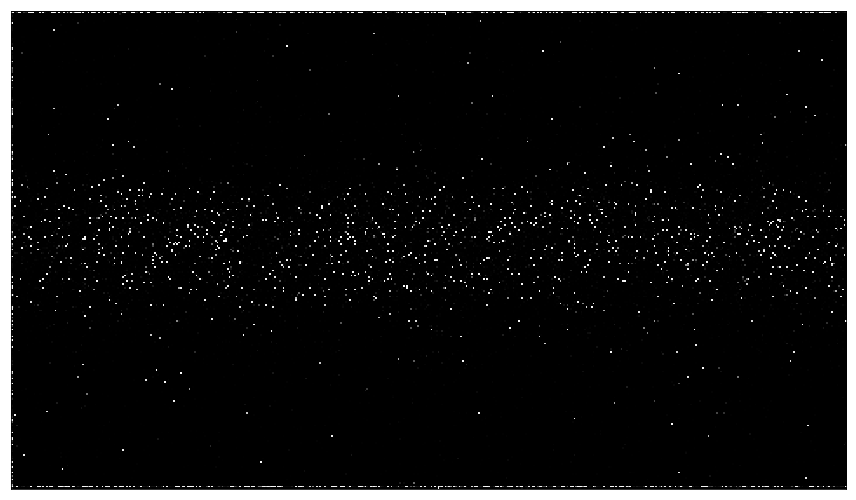

In [0]:
show_test_images(1)

tensor(129008.7344, device='cuda:0')


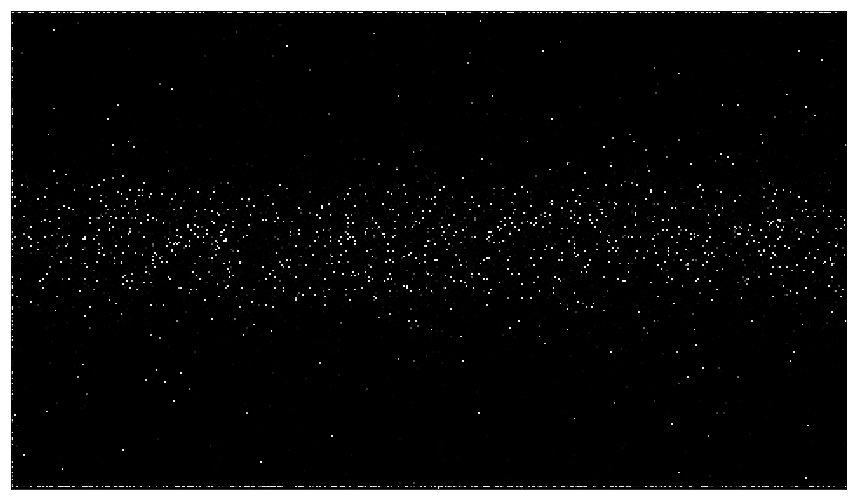

In [0]:
show_test_images(1)

tensor(129906.8125, device='cuda:0')


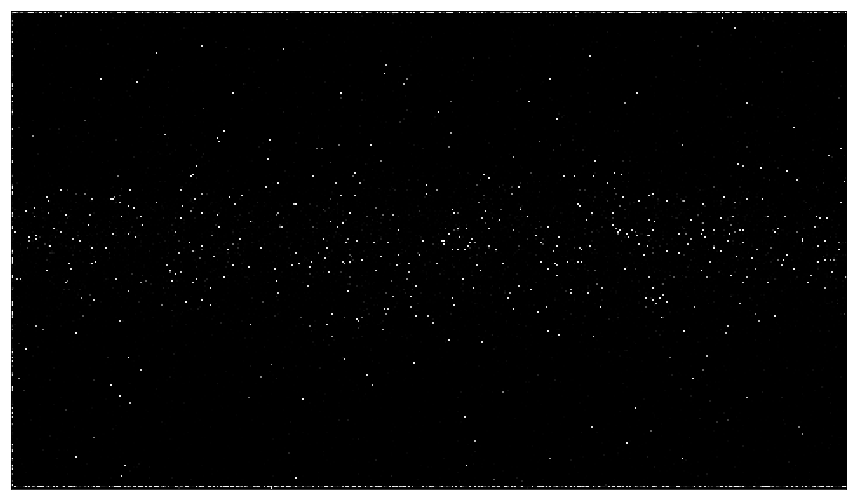

In [0]:
show_test_images(1)

tensor(126105.6406, device='cuda:0')


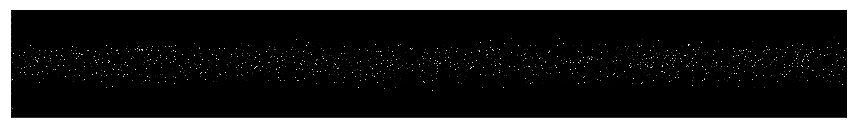

In [0]:
show_test_images(1,"new")

In [0]:
with open('short_song_list.csv','r') as songfile:
  for line in songfile:
    new_list = line.split(',')
print(new_list[0])

MIDI-Unprocessed_R1_D1-1-8_mid--AUDIO-from_mp3_06_R1_2015_wav--3.midi
